# Задача 18

### Распознавание британских гласных (11 штук) по данным с динамиков, рекомендуется использовать нормированные признаки (файл .scaled). Решить задачу многоклассовой классификации с помощью решающего дерева. Реализовать метод решающего дерева, построить область разделения на классы в проекции на любые 2 признака.

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

## Data

### data has been taken from https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html

In [16]:
data = pd.read_csv('input/vowel.scale.txt', sep = ' ', header=None)

### clean up the data

In [17]:
for i in range(1,11):
    data[i] = data[i].apply(lambda x: x.split(':')[1]).astype('float32')

data.rename({0:'vowel_num'}, axis=1, inplace=True)
data.drop(11, axis=1, inplace=True)

### divide the data into train and test

In [18]:
train, test = train_test_split(data, shuffle = True, stratify = data['vowel_num'], test_size=0.2,  random_state = 42)

## Description to the data

In [19]:
data.describe()

,vowel_num,1,2,3,4,5,6,7,8,9,10
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,5.000000,-0.042480,-0.051877,0.045640,0.074435,-0.121920,-0.101511,0.057468,0.153334,-0.079474,0.037342
std,3.165277,0.448696,0.365775,0.380186,0.427423,0.364836,0.410084,0.326023,0.401605,0.424082,0.364316
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.000000,-0.396721,-0.309783,-0.209487,-0.263611,-0.395528,-0.402783,-0.156462,-0.140425,-0.357118,-0.237321
50%,5.000000,-0.009836,-0.052615,0.017692,0.036389,-0.135928,-0.137844,0.072789,0.193526,-0.070500,0.038687
75%,8.000000,0.264286,0.158711,0.300641,0.429444,0.133148,0.167088,0.282313,0.452630,0.198152,0.288036
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Graphs of the distribution of data

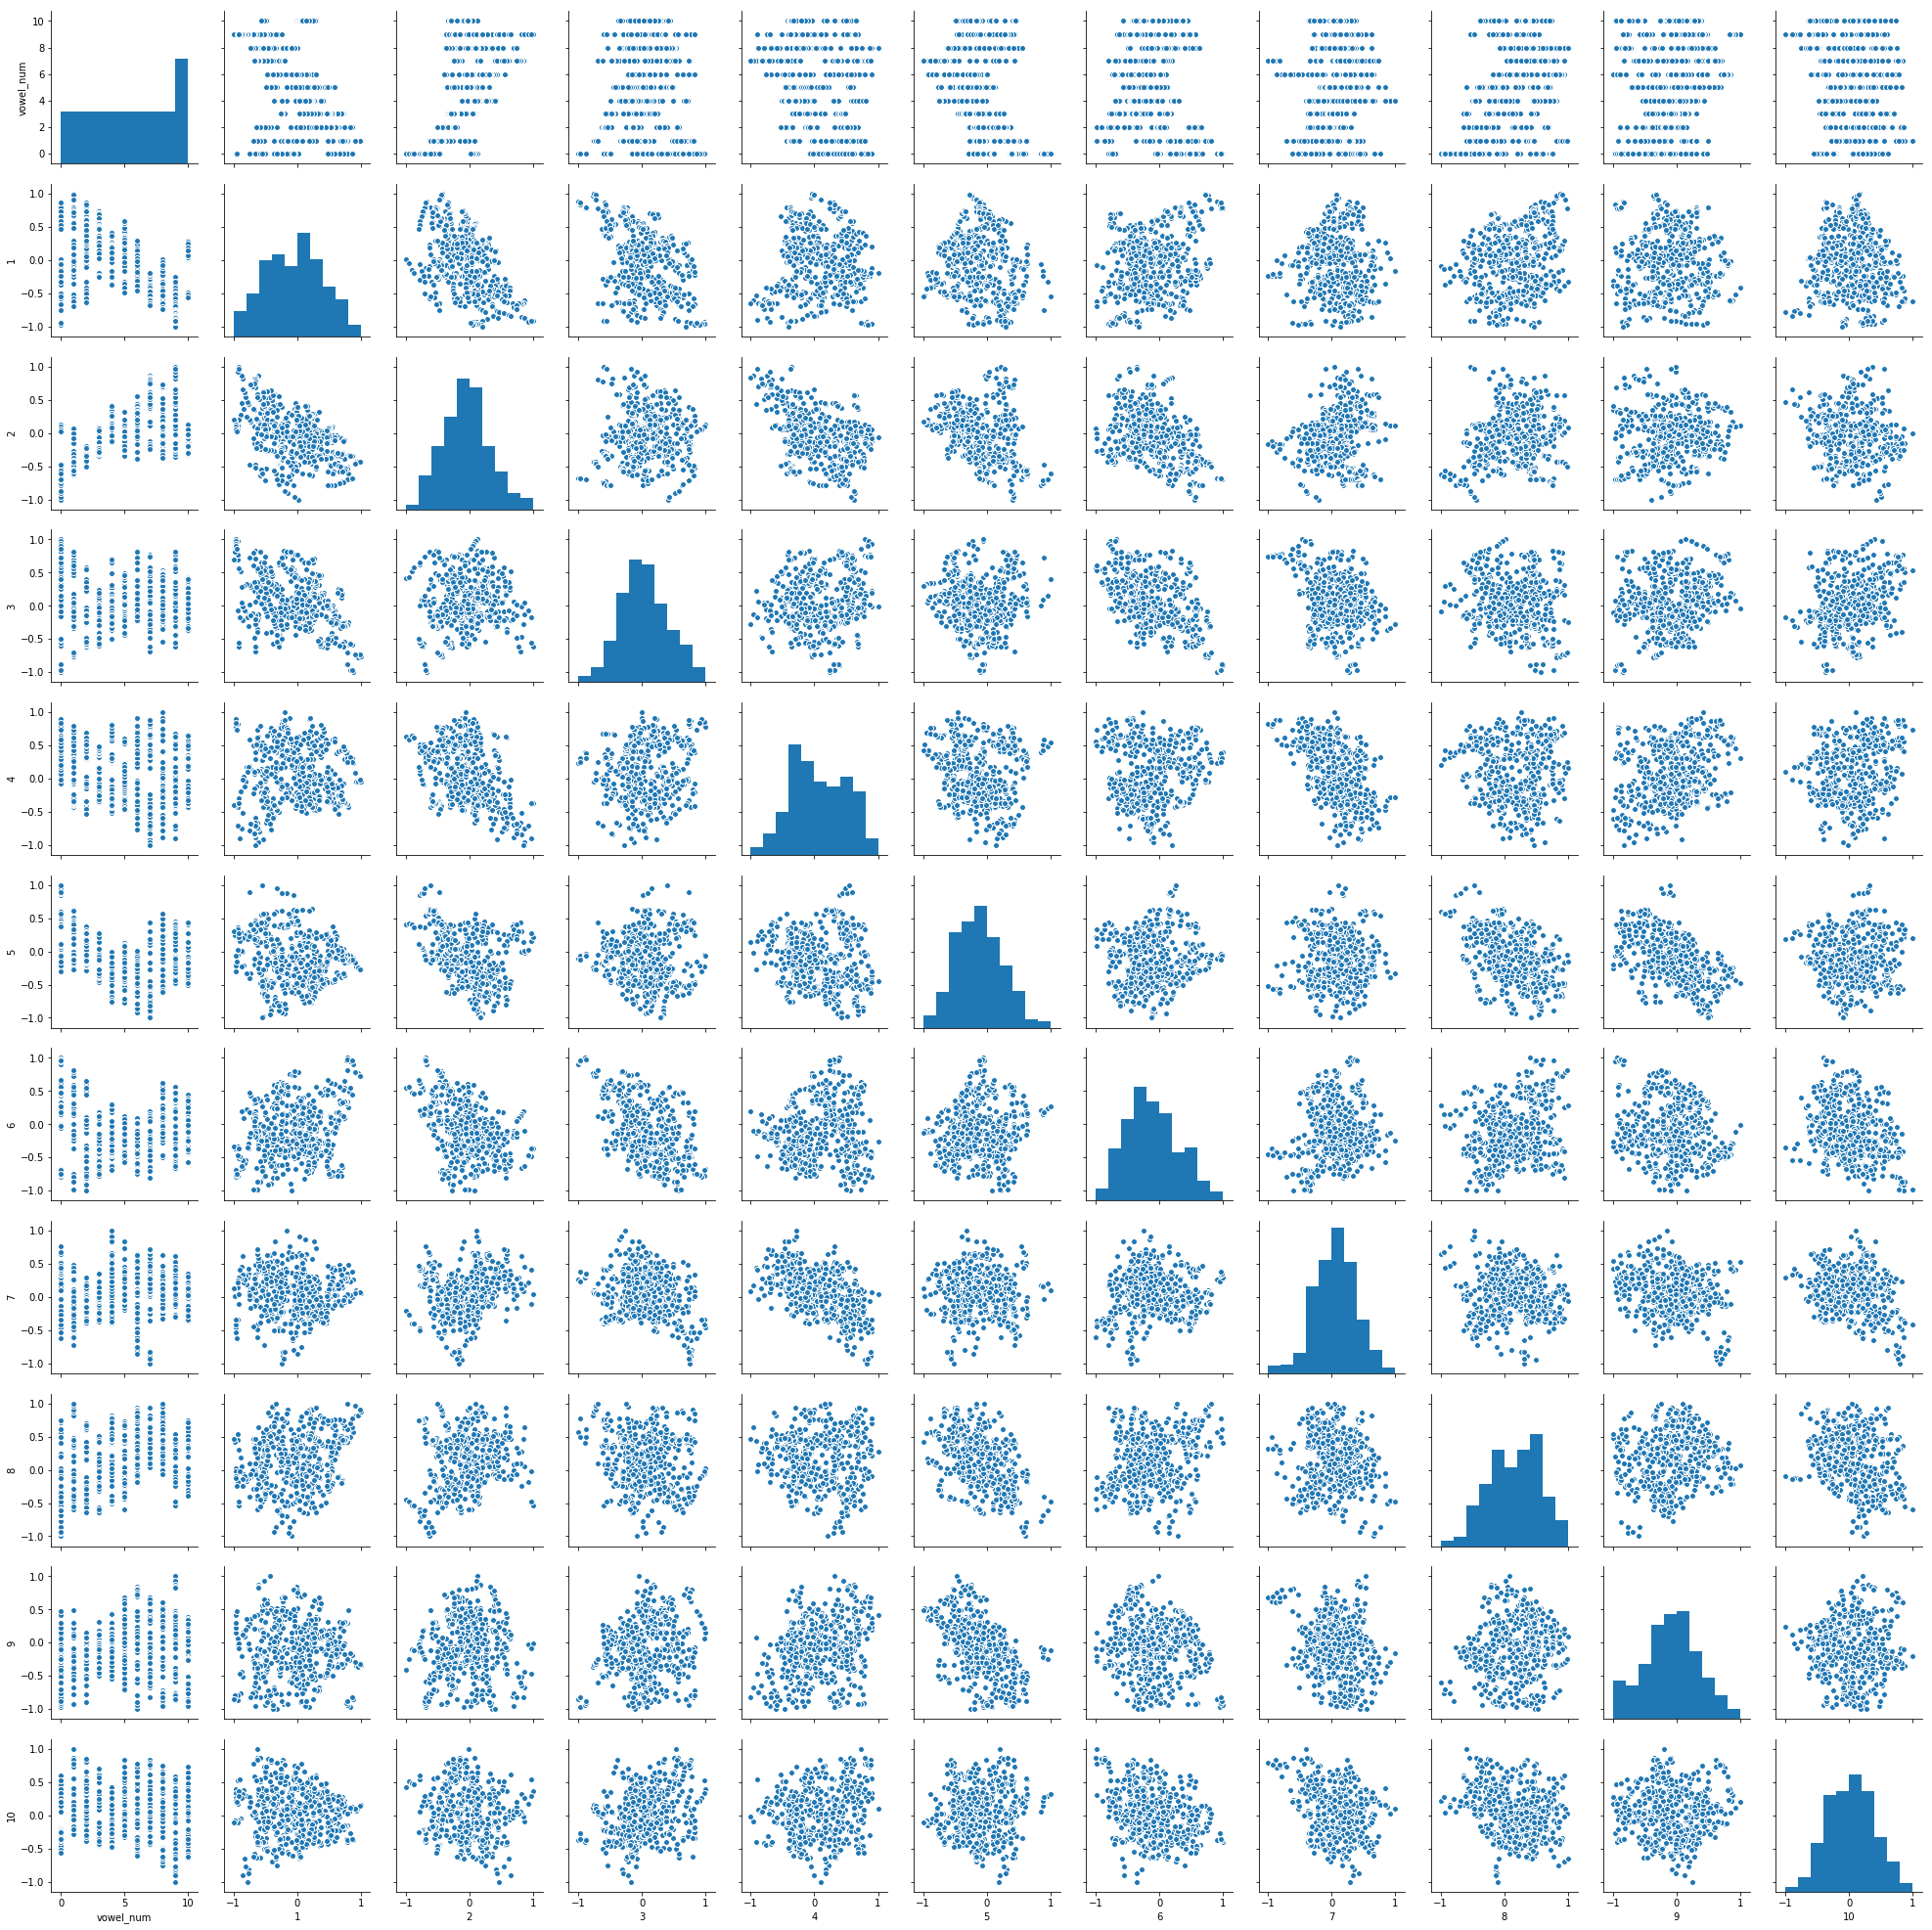

In [20]:
sns.pairplot(data)

### interactive chart distribution of the features for all the letters

In [28]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

for feature in range(1,11):
    layer = []
    for y in data['vowel_num'].unique():
        layer.append(
            go.Box(y = data[data['vowel_num'] == y][feature], name = ''.format(y))
        )

    # visualizing
    iplot(layer, link_text='feature# {}'.format(feature))

### crossvalidation

In [33]:
train_columns = list(range(1,11))
X = data[train_columns].values
y = data['vowel_num'].values

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
model = DecisionTreeClassifier(random_state = 42)
score = cross_val_score(model, X, y, cv = cv, scoring = 'accuracy')

score.mean(), score.std()

(0.8101010101010102, 0.042587468583600345)

In [38]:
parameters={
    'min_samples_split' : range(2,20,2),
    'max_depth': range(1,20,2),
    'max_features': range(1,11)    
}

clf = GridSearchCV(model, parameters, scoring='accuracy', n_jobs=-1, cv=cv)
clf.fit(X,y)

prediction = model.predict(test[train_columns])
accuracy_score(test['vowel_num'], prediction)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.